In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
%matplotlib inline

In [2]:
bank = pd.read_csv('bank.csv')

In [3]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

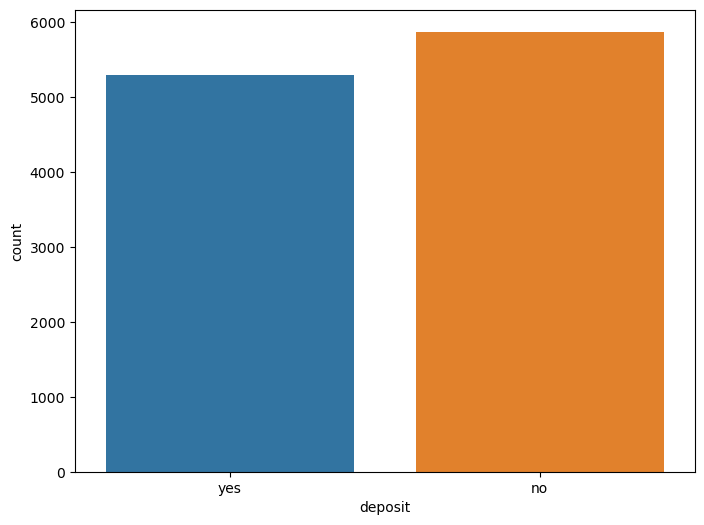

In [5]:
plt.figure(figsize = (8,6))
sns.countplot(x='deposit',data =bank)
plt.show()

<Axes: xlabel='job', ylabel='count'>

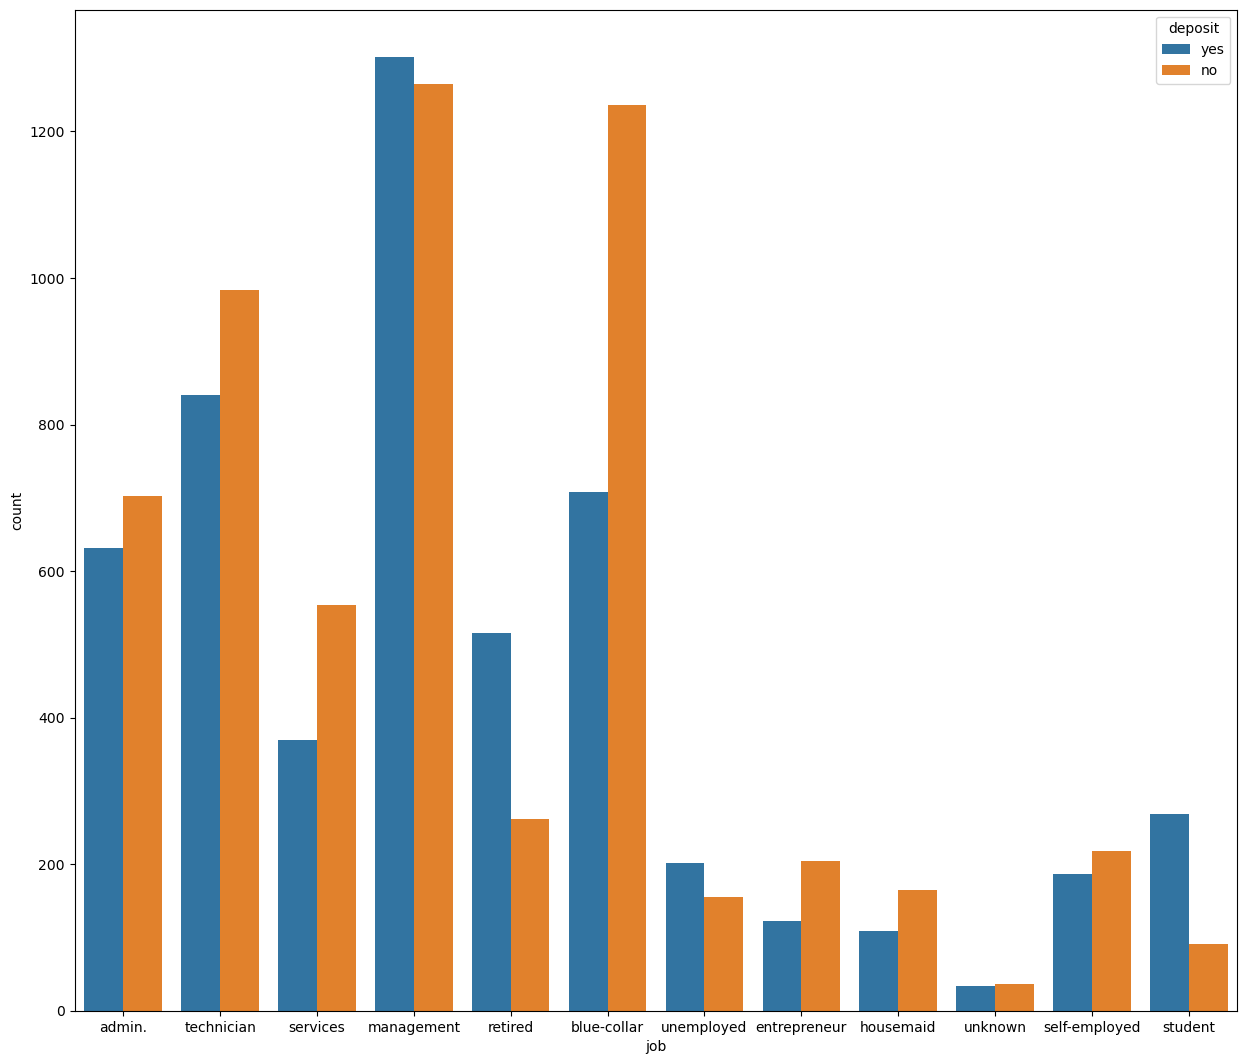

In [7]:
plt.figure(figsize = (15,13))
sns.countplot(x='job', data=bank , hue= 'deposit')

<Axes: xlabel='marital', ylabel='count'>

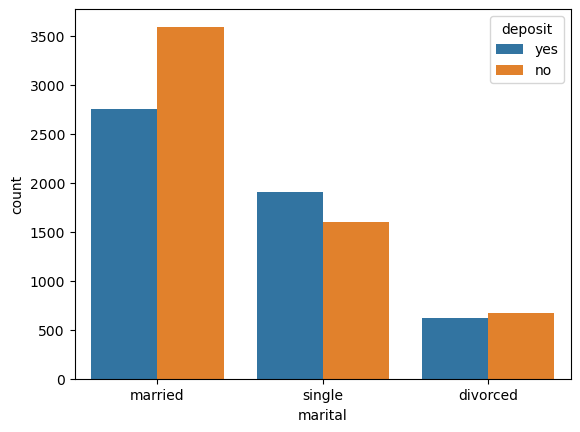

In [8]:
sns.countplot(x='marital',hue='deposit',data=bank)

<Axes: xlabel='education', ylabel='count'>

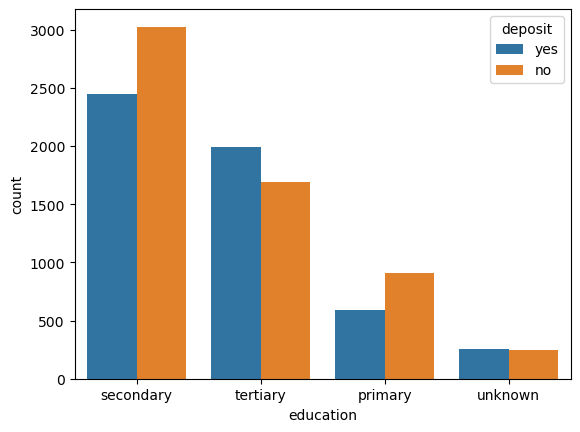

In [9]:
sns.countplot(x='education', hue='deposit',data=bank)

<Axes: xlabel='housing', ylabel='count'>

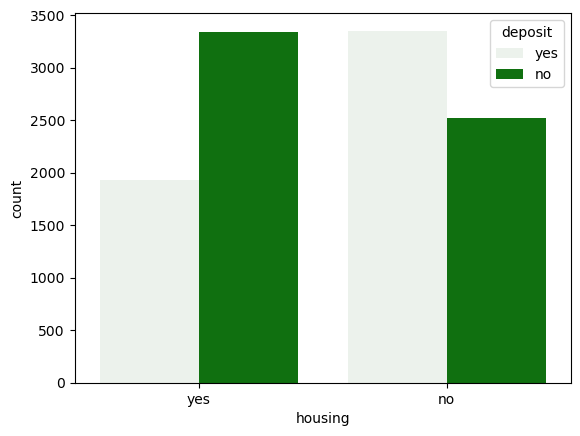

In [19]:
sns.countplot(x='housing',hue='deposit',color='green',data=bank)

<Axes: xlabel='loan', ylabel='count'>

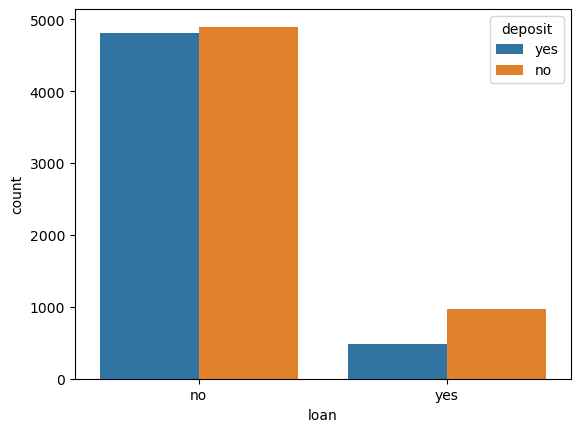

In [20]:
sns.countplot(x='loan',hue='deposit',data=bank)

<Axes: xlabel='poutcome', ylabel='count'>

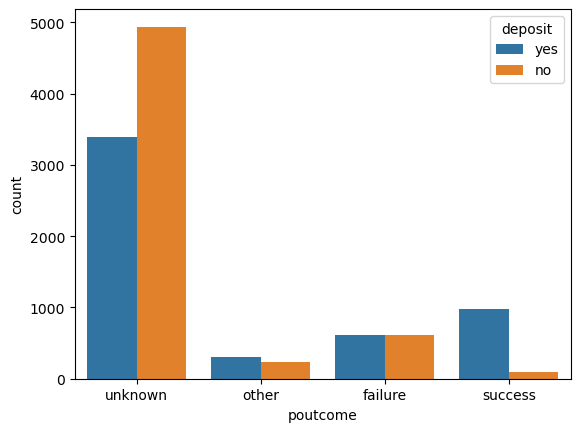

In [21]:
sns.countplot(x='poutcome',hue='deposit',data=bank)

<Axes: xlabel='deposit', ylabel='age'>

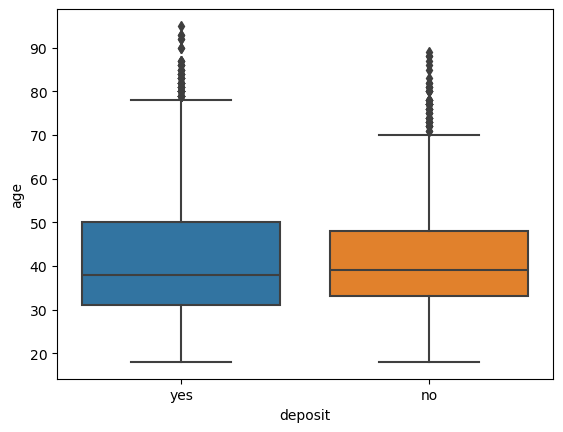

In [22]:
sns.boxplot(x='deposit',y='age',data=bank)

C:\Users\mazen\AppData\Local\Temp\ipykernel_10592\2173257465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['age'])
C:\Users\mazen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

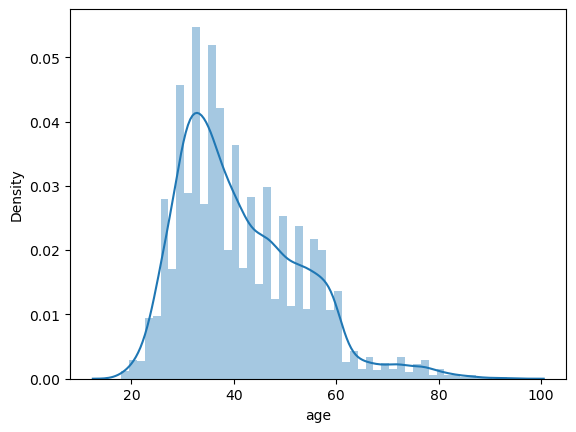

In [23]:
sns.distplot(bank['age'])

In [27]:
figure = px.box(x=bank['deposit'],y=bank['age'])
figure.show()


In [37]:
bank[bank.duplicated()].sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: object

In [38]:
# Remove contact column as it does not affect much in predicting target feature
bank = bank.drop(columns = "contact", axis = 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


In [39]:
labelEncoder = LabelEncoder()
bank['deposit'] = labelEncoder.fit_transform(bank['deposit'])
bank['marital'] = labelEncoder.fit_transform(bank['marital'])
bank['education'] = labelEncoder.fit_transform(bank['education'])
bank['default'] = labelEncoder.fit_transform(bank['default'])
bank['housing'] = labelEncoder.fit_transform(bank['housing'])
bank['loan'] = labelEncoder.fit_transform(bank['loan'])
bank['poutcome'] = labelEncoder.fit_transform(bank['poutcome'])

In [40]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,1,0,2343,1,0,5,may,1042,1,-1,0,3,1
1,56,admin.,1,1,0,45,0,0,5,may,1467,1,-1,0,3,1
2,41,technician,1,1,0,1270,1,0,5,may,1389,1,-1,0,3,1
3,55,services,1,1,0,2476,1,0,5,may,579,1,-1,0,3,1
4,54,admin.,1,2,0,184,0,0,5,may,673,2,-1,0,3,1


In [41]:
bank.drop(columns = ["job", "month"], axis =1, inplace = True)

In [42]:
bank.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,1,0,2343,1,0,5,1042,1,-1,0,3,1
1,56,1,1,0,45,0,0,5,1467,1,-1,0,3,1
2,41,1,1,0,1270,1,0,5,1389,1,-1,0,3,1
3,55,1,1,0,2476,1,0,5,579,1,-1,0,3,1
4,54,1,2,0,184,0,0,5,673,2,-1,0,3,1


In [45]:
X = bank.drop(['deposit'], axis=1)
y=  bank['deposit']

In [46]:
X_train ,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = DT.predict(X_test) 

In [49]:
acc = accuracy_score(y_test,y_pred)

In [50]:
acc

0.7254814151365876

In [51]:
CM = confusion_matrix(y_test,y_pred)

In [52]:
CM

array([[863, 303],
       [310, 757]], dtype=int64)

In [53]:
CR = classification_report(y_test,y_pred)

In [54]:
CR

'              precision    recall  f1-score   support\n\n           0       0.74      0.74      0.74      1166\n           1       0.71      0.71      0.71      1067\n\n    accuracy                           0.73      2233\n   macro avg       0.72      0.72      0.72      2233\nweighted avg       0.73      0.73      0.73      2233\n'